In [104]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Input,Dense,Dropout,Flatten,BatchNormalization
from keras import regularizers
from keras.optimizers import SGD
from keras.models import Sequential
import seaborn as sns

In [28]:
# SETTING THE DISPLAY OPTION AS MAXIMUM FOR BOTH COLUMNS AND ROWS
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
# IMPORTING THE DATASET
loan_df=pd.read_csv('loan_data.csv')
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
# CHECKING THE DATA TYPES FOR THE DATASET
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
# CHECKING THE SUMMARY OR STATISTICS OF THE FEATURES
loan_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [13]:
# CHECKING IF THERE IS ANY NULL VALUES PRESENT IN THE DATASET
loan_df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

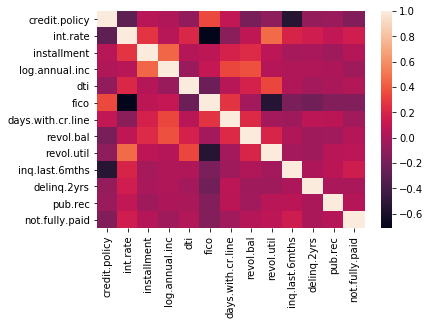

In [24]:
# CHECKING AND FINDING OUT THE RELEVANT FEATURES BASED ON CORRELATIONS
sns.heatmap(loan_df.corr())

In [48]:
# CHECKING THE VARITIES OF LOAN PROVIDED BY THE BANK

print('The Total Categories of loan are :\t{}'.format(loan_df['purpose'].nunique()))

print('\n The names of the different loan Categories are :\n {}'.format(loan_df['purpose'].unique()))

print('\n The total no of cases for each Categories are :\n {} '.format(loan_df['purpose'].value_counts()))

The Total Categories of loan are :	7

 The names of the different loan Categories are :
 ['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']

 The total no of cases for each Categories are :
 debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64 


In [53]:
# REDUCING THE DIMENSION OF THE CATEGORICAL VALUE AND CHANGING IT TO NUMERICAL USING LABEL ENCODER
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(loan_df['purpose'])
le.transform(loan_df['purpose'])
le.classes_
loan_df['purpose']=le.fit_transform(loan_df['purpose'])
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [54]:
# AFTER THE LABEL ENCODER IS APPLIED SUCCESSFULLY CHECKING THE DATATYPES OF THE ORIGINAL DATASET
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int64  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1.0 MB


In [55]:
#CHECKING THE SHAPE OF THE DATA SET
loan_df.shape

(9578, 14)

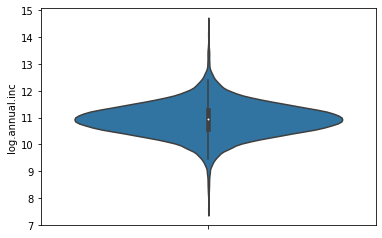

In [57]:
# CHECKING DIFFERENT VARAIBLES AND HOW THEY ARE AFFECTING THE FEATURE 'NOT FULLY PAID'
sns.violinplot(y='log.annual.inc',hue='not.fully.paid',data=loan_df)

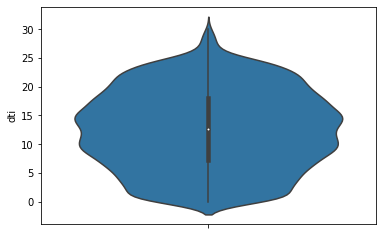

In [58]:
sns.violinplot(y='dti',hue='not.fully.paid',data=loan_df)

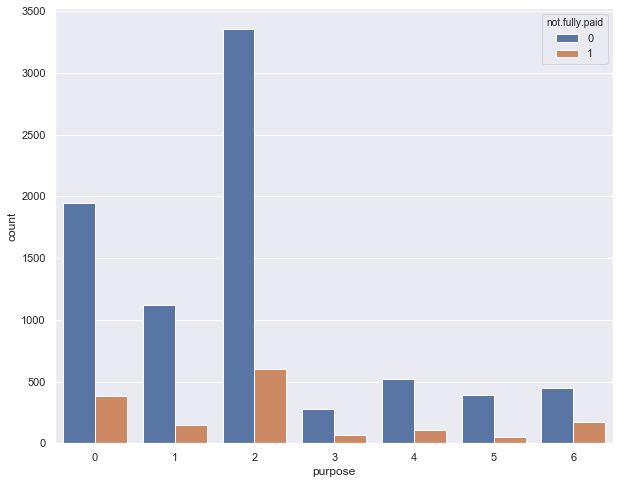

In [62]:
sns.set(rc={"figure.figsize":(10,8)})
sns.countplot(data=loan_df,x='purpose',hue='not.fully.paid')


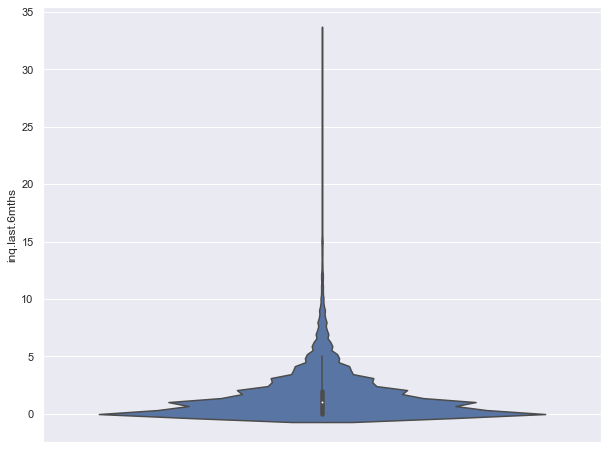

In [63]:
sns.violinplot(y="inq.last.6mths",hue='not.fully.paid',data=loan_df)

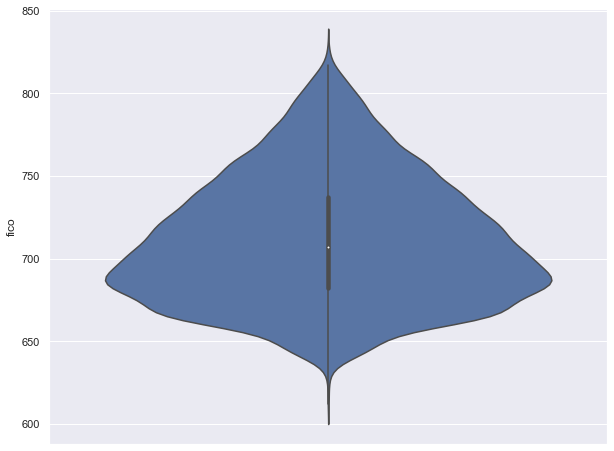

In [65]:
sns.violinplot(y='fico',hue='not.fully.paid',data=loan_df)

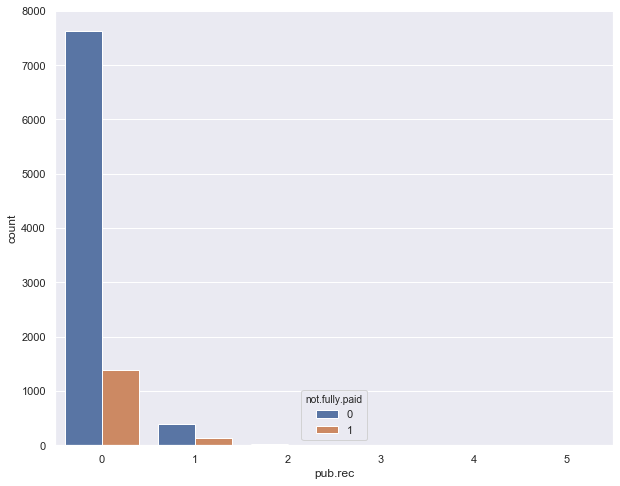

In [66]:
sns.countplot(x='pub.rec',hue='not.fully.paid',data=loan_df)

In [77]:
#IMPORTING THE INPUT DATA FOR THE ARTIFICIAL NEURAL NETWORK AND CHANGING ITS DATATYPE TO FLOAS32
input_matrix=np.loadtxt('input.csv',delimiter=',',ndmin=2).astype('float32')
input_matrix.shape

(9578, 18)

In [78]:
# VALIDATIING THE CHANGE
type(input_matrix[0][0])

numpy.float32

In [81]:
# IMPORTING THE TARGET DATA FOR THE ARTIFICAL NEURAL NETWORK AND CHANGING ITS DATATYPE TO FLOAT32
label=np.loadtxt('output.csv',delimiter=',',ndmin=2).astype('float32')
label.shape

(9578, 2)

In [83]:
#VALIDATING IT
type(label[0][0])

numpy.float32

In [84]:
from math import floor,ceil

# Splitting Data into training and testing

In [86]:
# SPLITTING THE DATA INTO TRAIN TEST
train_size=0.75
train_cnt=floor(input_matrix.shape[0]*train_size)
x_train=input_matrix[0:train_cnt]
y_train=label[0:train_cnt]
x_test=input_matrix[train_cnt:]
y_test=label[train_cnt:]

In [87]:
x_train.shape

(7183, 18)

In [88]:
y_train.shape

(7183, 2)

In [89]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [103]:
#BUILDING THE MODEL USING SIMPLE ANN
model=Sequential()
model.add(Dense(100,input_dim=18,activation='relu',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(20,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               1900      
_________________________________________________________________
batch_normalization_6 (Batch (None, 100)               400       
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 150)               15150     
_________________________________________________________________
dropout_9 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 20)                3020      
_________________________________________________________________
dense_18 (Dense)             (None, 2)               

In [106]:
#CHANGING THE OPTMIZER PARAMETERS AND COMPILING THE MODEL
sgd=SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [111]:
#RUNNING THE MODEL ON TRAIN AND VALIDATING IT ON TEST
model.fit(x_train,y_train,
         epochs=200,
         batch_size=500,
         validation_data=(x_test,y_test),
         validation_freq=5,
         shuffle=True,
         verbose=1)

Train on 7183 samples, validate on 2395 samples
Epoch 1/200
7183/7183 [==============================] - 0s 19us/step - loss: 0.2354 - accuracy: 0.9347
Epoch 2/200
7183/7183 [==============================] - 0s 16us/step - loss: 0.2362 - accuracy: 0.9347
Epoch 3/200
7183/7183 [==============================] - 0s 15us/step - loss: 0.2356 - accuracy: 0.9347
Epoch 4/200
7183/7183 [==============================] - 0s 15us/step - loss: 0.2347 - accuracy: 0.9347
Epoch 5/200
7183/7183 [==============================] - 0s 17us/step - loss: 0.2362 - accuracy: 0.9347 - val_loss: 0.2482 - val_accuracy: 0.9177
Epoch 6/200
7183/7183 [==============================] - 0s 15us/step - loss: 0.2359 - accuracy: 0.9347
Epoch 7/200
7183/7183 [==============================] - 0s 15us/step - loss: 0.2355 - accuracy: 0.9347
Epoch 8/200
7183/7183 [==============================] - 0s 16us/step - loss: 0.2355 - accuracy: 0.9347
Epoch 9/200
7183/7183 [==============================] - 0s 16us/step - loss: 

7183/7183 [==============================] - 0s 15us/step - loss: 0.2352 - accuracy: 0.9347
Epoch 74/200
7183/7183 [==============================] - 0s 12us/step - loss: 0.2354 - accuracy: 0.9347
Epoch 75/200
7183/7183 [==============================] - 0s 14us/step - loss: 0.2345 - accuracy: 0.9347 - val_loss: 0.2505 - val_accuracy: 0.9167
Epoch 76/200
7183/7183 [==============================] - 0s 11us/step - loss: 0.2346 - accuracy: 0.9347
Epoch 77/200
7183/7183 [==============================] - 0s 13us/step - loss: 0.2342 - accuracy: 0.9346
Epoch 78/200
7183/7183 [==============================] - 0s 12us/step - loss: 0.2353 - accuracy: 0.9347
Epoch 79/200
7183/7183 [==============================] - 0s 12us/step - loss: 0.2337 - accuracy: 0.9347
Epoch 80/200
7183/7183 [==============================] - 0s 13us/step - loss: 0.2349 - accuracy: 0.9347 - val_loss: 0.2496 - val_accuracy: 0.9167
Epoch 81/200
7183/7183 [==============================] - 0s 12us/step - loss: 0.2342 - a

7183/7183 [==============================] - 0s 14us/step - loss: 0.2332 - accuracy: 0.9347
Epoch 145/200
7183/7183 [==============================] - 0s 14us/step - loss: 0.2350 - accuracy: 0.9347 - val_loss: 0.2496 - val_accuracy: 0.9161
Epoch 146/200
7183/7183 [==============================] - 0s 13us/step - loss: 0.2341 - accuracy: 0.9347
Epoch 147/200
7183/7183 [==============================] - 0s 13us/step - loss: 0.2340 - accuracy: 0.9347
Epoch 148/200
7183/7183 [==============================] - 0s 14us/step - loss: 0.2345 - accuracy: 0.9347
Epoch 149/200
7183/7183 [==============================] - 0s 13us/step - loss: 0.2340 - accuracy: 0.9347
Epoch 150/200
7183/7183 [==============================] - 0s 15us/step - loss: 0.2353 - accuracy: 0.9347 - val_loss: 0.2508 - val_accuracy: 0.9150
Epoch 151/200
7183/7183 [==============================] - 0s 13us/step - loss: 0.2338 - accuracy: 0.9347
Epoch 152/200
7183/7183 [==============================] - 0s 14us/step - loss: 0.

In [112]:
# EVALUATING ON TEST DATASET
score=model.evaluate(x_test,y_test,verbose=1)

2395/2395 [==============================] - 0s 38us/step


In [113]:
print('test_loss :\t {}'.format(score[0]))
print('test_accuracy :\t {}'.format(score[1]))

test_loss :	 0.24847396295478796
test_accuracy :	 0.9160751700401306


In [114]:
#PREDICTING THE TARGET VARIABLES USING TEST DATASET
predicted=model.predict(x_test)

In [115]:
predicted

array([[0.06871097, 0.9310218 ],
       [0.04486564, 0.954314  ],
       [0.1027675 , 0.8971593 ],
       ...,
       [0.04148034, 0.9576146 ],
       [0.10368316, 0.8992291 ],
       [0.06607146, 0.9342845 ]], dtype=float32)

In [116]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)